In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt

torch.__version__

'2.1.0+cpu'

In [6]:
X = torch.arange(0,1,0.02).unsqueeze(dim=1)
y = torch.rand(1).item() * X + torch.rand(1).item()

X[:10], y[:10]


(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.2442],
         [0.2465],
         [0.2487],
         [0.2509],
         [0.2531],
         [0.2554],
         [0.2576],
         [0.2598],
         [0.2620],
         [0.2642]]))

In [7]:
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

In [9]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
    """Plots training data, test data and compares predictions"""
    plt.figure(figsize=(10,7))
    plt.scatter(train_data, train_labels, c='b', s=4, label="Training Data")
    plt.scatter(test_data, test_labels, c='g', s=4, label="Testing Data")
    if predictions is not None:
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")
        
    plt.legend(prop={'size':14})

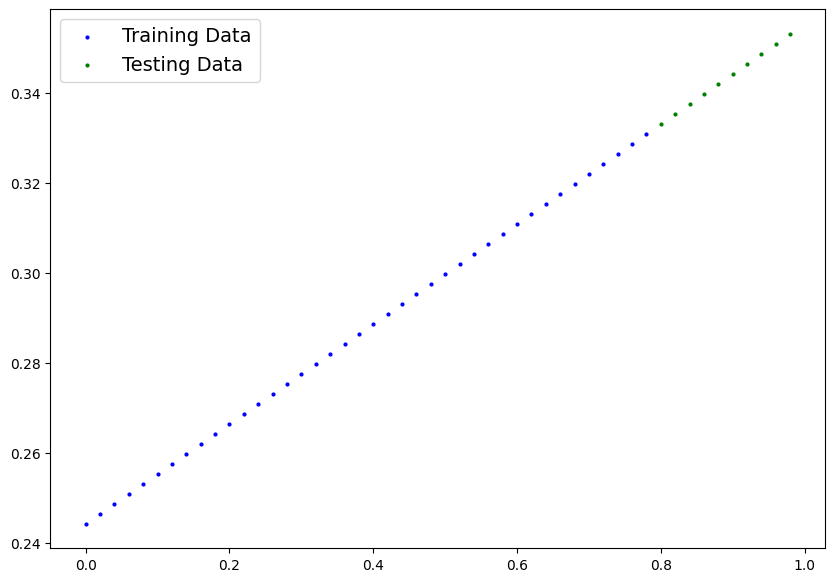

In [10]:
plot_predictions()

In [11]:
from torch import nn
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1,
                                                requires_grad=True,
                                                dtype=torch.float32))
        self.bias = nn.Parameter(torch.randn(1,
                                             requires_grad=True,
                                             dtype=torch.float32))
    def forward(self, x: torch.Tensor):
        return self.weights * x + self.bias

In [20]:
weights = torch.rand(1).item()
bias = torch.rand(1).item()

X = torch.arange(0,1,0.02).unsqueeze(dim=1)
y = weights*X+bias

# Train_Test Split:
split = int(0.8*len(X))
X_train, y_train = X[:split], y[:split]
X_test, y_test = X[split:], y[split:]

# Plot Predictions:
def plot_predictions(train_data=X_train,
                    train_label=y_train,
                    test_data=X_test,
                    test_label=y_test,
                    predictions=None):
    
    plt.figure(figure=(10,7))
    plt.scatter(train_data,train_label,c='b',s=4,label="Training Data")
    plt.scatter(test_data,test_label,c='g',s=4,label="Testing Data")
    if predictions is not None:
        plt.scatter(test_data,predictions,c='r',s=4,label="Predictions")
    plt.legend(prop={'size':14})

# Define Linear Regression Model
from torch import nn
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1,
                                                requires_grad=True,
                                                dtype=torch.float32))
        self.bias = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype=torch.float32))

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weights*x+self.bias

In [21]:
torch.manual_seed(42)
model_0=LinearRegressionModel()
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [22]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [23]:
with torch.inference_mode():
    y_preds = model_0(X_test)
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

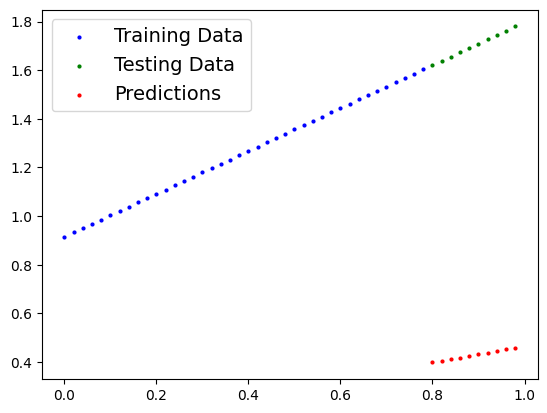

In [24]:
plot_predictions(predictions=y_preds)

In [30]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.01)
torch.manual_seed(42)
epochs=1
for epoch in range(epochs):
    model_0.train()
    y_preds=model_0(X_train)
    loss=loss_fn(y_preds,y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    model_0.eval()
    
    print(model_0.state_dict())
    with torch.inference_mode():
        y_preds_new = model_0(X_test)
        plot_predictions(predictions=y_preds_new)

OrderedDict([('weights', tensor([0.4820])), ('bias', tensor([0.2078]))])
OrderedDict([('weights', tensor([0.4899])), ('bias', tensor([0.2178]))])
OrderedDict([('weights', tensor([0.4979])), ('bias', tensor([0.2278]))])
OrderedDict([('weights', tensor([0.5058])), ('bias', tensor([0.2378]))])
OrderedDict([('weights', tensor([0.5138])), ('bias', tensor([0.2478]))])
OrderedDict([('weights', tensor([0.5217])), ('bias', tensor([0.2578]))])
OrderedDict([('weights', tensor([0.5297])), ('bias', tensor([0.2678]))])
OrderedDict([('weights', tensor([0.5376])), ('bias', tensor([0.2778]))])
OrderedDict([('weights', tensor([0.5456])), ('bias', tensor([0.2878]))])
OrderedDict([('weights', tensor([0.5535])), ('bias', tensor([0.2978]))])
OrderedDict([('weights', tensor([0.5615])), ('bias', tensor([0.3078]))])
OrderedDict([('weights', tensor([0.5694])), ('bias', tensor([0.3178]))])
OrderedDict([('weights', tensor([0.5774])), ('bias', tensor([0.3278]))])
OrderedDict([('weights', tensor([0.5853])), ('bias'

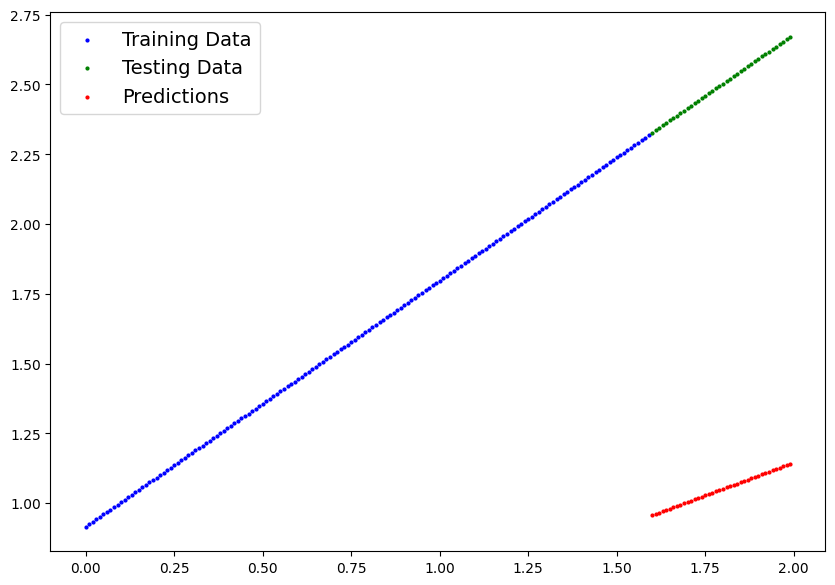

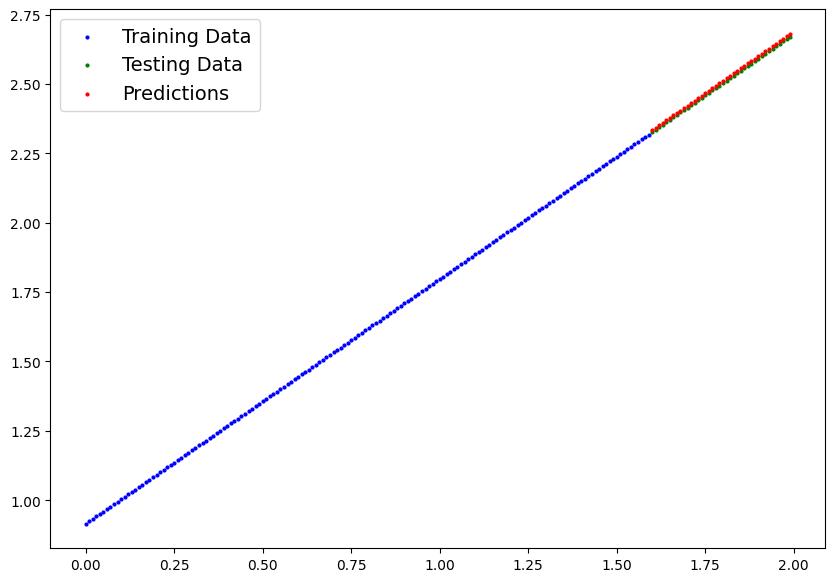

In [37]:
weights = torch.rand(1).item()
bias = torch.rand(1).item()
X = torch.arange(0,2,0.01).unsqueeze(dim=1)
y = weights*X + bias

split = int(0.8*len(X))
X_train, y_train = X[:split],y[:split]
X_test, y_test = X[split:],y[split:]

def plot_predictions(train_data=X_train, test_data=X_test,
                    train_labels=y_train, test_labels=y_test,
                    predictions=None):
    plt.figure(figsize=(10,7))
    plt.scatter(train_data,train_labels,c='b',s=4,label="Training Data")
    plt.scatter(test_data,test_labels,c='g',s=4,label="Testing Data")
    if predictions is not None:
        plt.scatter(test_data,predictions,c='r',s=4,label="Predictions")
    plt.legend(prop={'size':14})

import torch.nn as nn
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1,
                                                requires_grad=True,
                                                dtype=torch.float32))
        self.bias = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype=torch.float32))

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weights*x + self.bias

model_0 = LinearRegressionModel()
list(model_0.parameters())
model_0.state_dict()
with torch.inference_mode():
    y_preds = model_0(X_test)
plot_predictions(predictions=y_preds)

loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.01)
torch.manual_seed(42)
epochs = 100
for epoch in range(epochs):
    model_0.train()
    y_preds=model_0(X_train)
    loss=loss_fn(y_preds, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    model_0.eval()
    print(model_0.state_dict())
with torch.inference_mode():
    y_preds_new = model_0(X_test) 
plot_predictions(predictions=y_preds_new)